Loan Status Prediction Project

The Aim of this project is to predict which customers will get their loan. This is a classification problem in Machine Learning.

In [ ]:
# Data analysis and Data visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

In [ ]:
# ML classifiers and Metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
#import data
loan_train = pd.read_excel('/content/train.xlsx')
loan_test = pd.read_excel('/content/test.xlsx')

In [ ]:
# preview data
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_train_cc = loan_train.copy()

In [ ]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
len(loan_train)

614

In [ ]:
len(loan_test)

367

In [ ]:
#missing data 
loan_train.isna().values.any()

True

In [ ]:
loan_test.isna().values.any()

True

<Figure size 720x432 with 0 Axes>

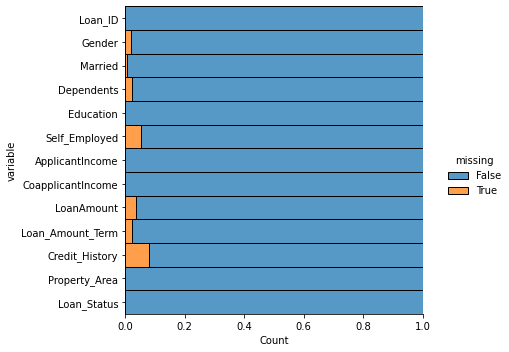

In [ ]:
#visualization of missing data in test
import seaborn as sns
plt.figure(figsize=(10,6))
sns.displot(
    data=loan_train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)
plt.show()

In [ ]:
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Data Cleaning and Preparation

Train Data:

In [ ]:
#forward fill
loan_train['Credit_History'].fillna(method='ffill', inplace=True)
loan_train['Credit_History'].isna().values.any()

False

In [ ]:
#filling median values
median_loan = loan_train['Loan_Amount_Term'].median()
loan_train['Loan_Amount_Term'].fillna((median_loan), inplace=True)
loan_train['Loan_Amount_Term'].isna().values.any()

False

In [ ]:
median_loan_amount = loan_train['LoanAmount'].median()
loan_train['LoanAmount'].fillna((median_loan_amount), inplace=True)
loan_train['LoanAmount'].isna().values.any()

False

In [ ]:
# Count of values which occurs frequently
loan_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
#fill with mode values
loan_train['Self_Employed'].fillna('No', inplace=True)
loan_train['Self_Employed'].isna().values.any()

False

In [ ]:
loan_train['Dependents'].fillna(0, inplace=True)
loan_train['Dependents'].isna().values.any()

False

In [ ]:
loan_train['Married'].mode()

0    Yes
dtype: object

In [ ]:
loan_train['Married'].fillna('Yes', inplace=True)
loan_train['Married'].isna().values.any()

False

In [ ]:
loan_train['Gender'].mode()

0    Male
dtype: object

In [ ]:
loan_train['Gender'].fillna('Male', inplace=True)
loan_train['Gender'].isna().values.any()

False

In [ ]:
#checking NaN values
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data Cleaning and Preparation

Test Data:

In [ ]:
loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
#credit history
loan_test['Credit_History'].fillna(method='ffill', inplace=True)

#loan amount term
median_loan_test = loan_test['Loan_Amount_Term'].median()
loan_test['Loan_Amount_Term'].fillna((median_loan_test), inplace=True)

#loan amount
median_loan_amount_test = loan_test['LoanAmount'].median()
loan_test['LoanAmount'].fillna((median_loan_amount_test), inplace=True)

#self employed
loan_test['Self_Employed'].fillna('No', inplace=True)

#dependents
loan_test['Dependents'].fillna(0, inplace=True)

#gender
loan_test['Gender'].fillna('Male', inplace=True)

In [ ]:
loan_test.isna().values.any()

False

In [ ]:
#checking NaN values
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Duplicate values

In [ ]:
#train
loan_train.duplicated().values.any()

False

In [ ]:
#test
loan_test.duplicated().values.any()

False

Exploratory Analysis and Data Visualization

In [ ]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


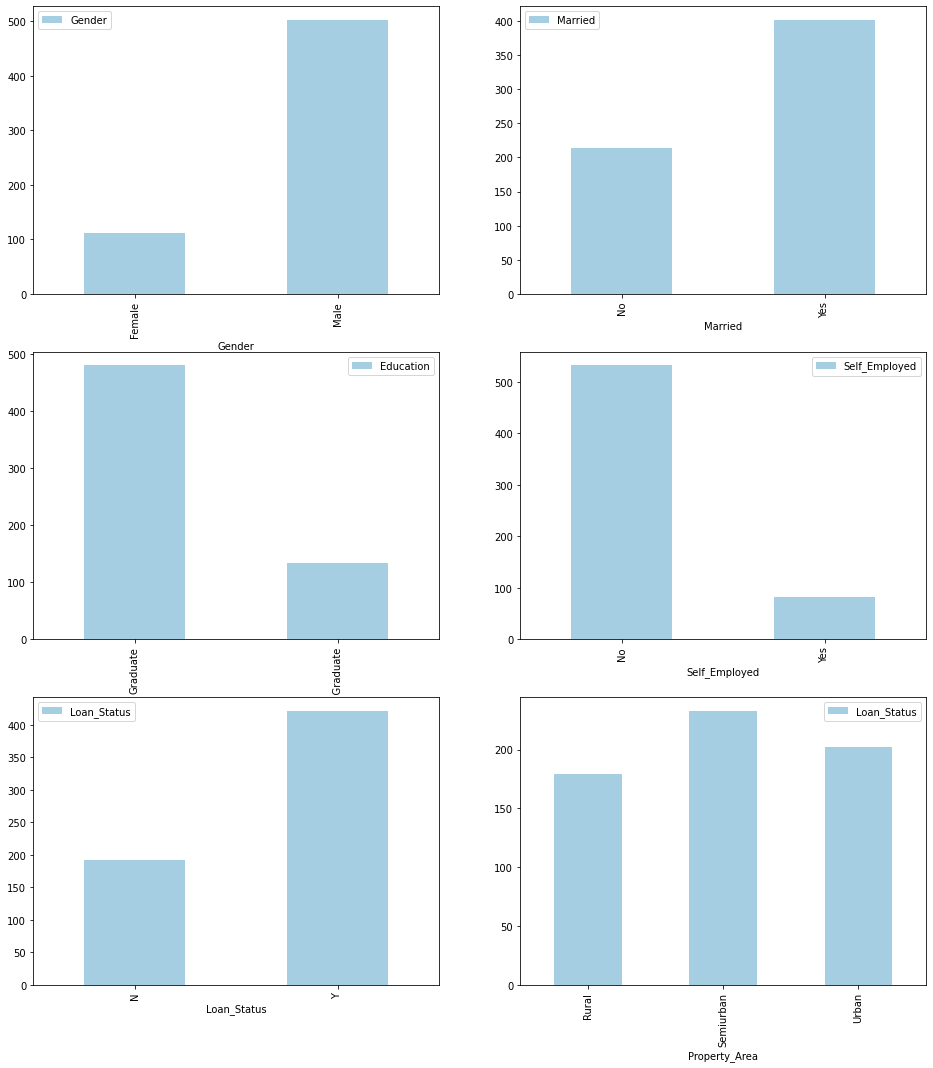

In [ ]:
#bar charts
fig, ax = plt.subplots(3, 2, figsize=(16, 18))
loan_train.groupby(['Gender'])[['Gender']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[0,0])
loan_train.groupby(['Married'])[['Married']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[0,1])
loan_train.groupby(['Education'])[['Education']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[1,0])
loan_train.groupby(['Self_Employed'])[['Self_Employed']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[1,1])
loan_train.groupby(['Loan_Status'])[['Loan_Status']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[2,0])
loan_train.groupby(['Property_Area'])[['Loan_Status']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[2,1])
plt.show()

In [ ]:
 #categorical columns into a list
 categorical_columns = loan_train_cc.select_dtypes('object').columns.to_list()

In [ ]:
categorical_columns[1:]

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

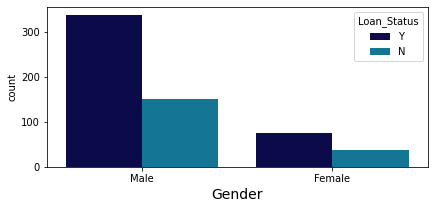

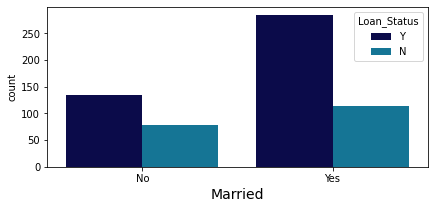

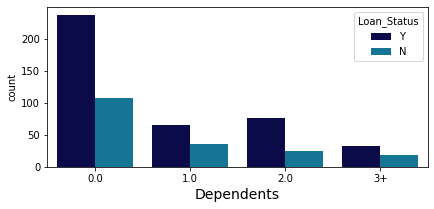

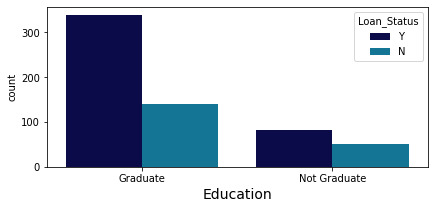

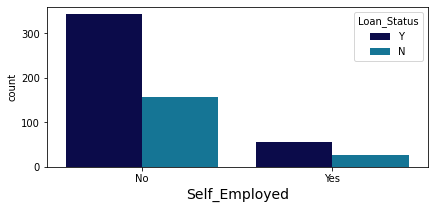

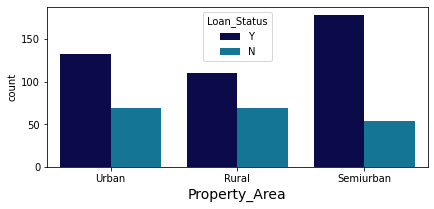

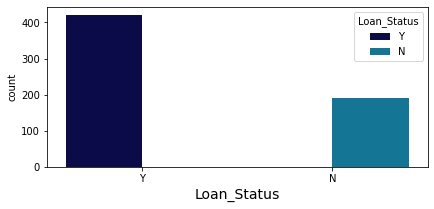

In [ ]:
#bar charts
for i in categorical_columns[1:]: 
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.countplot(x=i ,hue='Loan_Status', data=loan_train_cc, palette='ocean')
    plt.xlabel(i, fontsize=14)

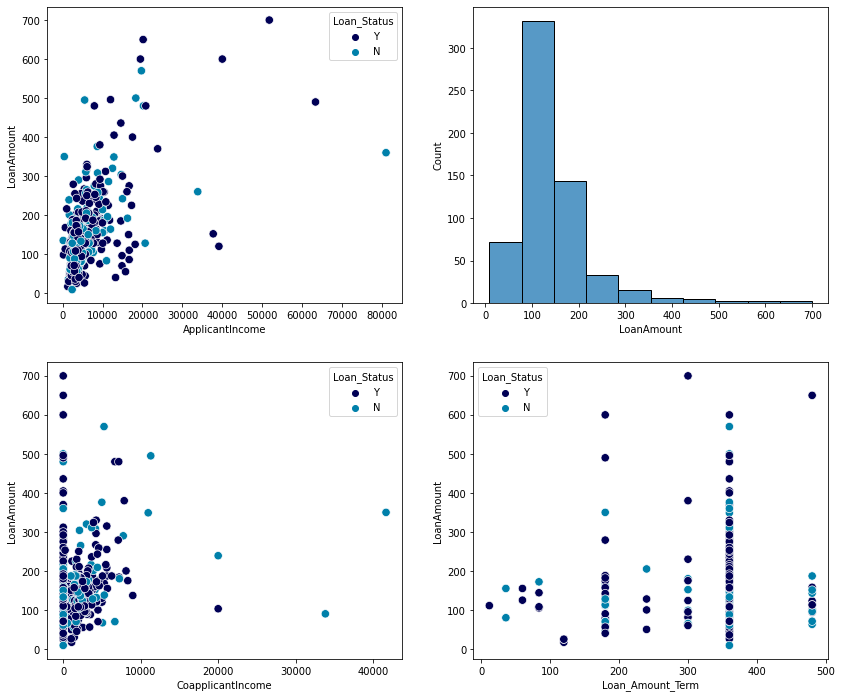

In [ ]:
#scatter plot
fig, ax = plt.subplots(2,2, figsize=(14,12))
sns.scatterplot(data=loan_train,x="ApplicantIncome", y="LoanAmount",s=70, hue="Loan_Status", palette='ocean',ax=ax[0,0])
sns.histplot(loan_train, x=loan_train['LoanAmount'], bins=10, ax=ax[0,1])
sns.scatterplot(data=loan_train,x='CoapplicantIncome', y='LoanAmount',s=70, hue='Loan_Status',palette='ocean', ax=ax[1,0])
sns.scatterplot(data=loan_train,x='Loan_Amount_Term', y='LoanAmount', s=70, hue='Loan_Status',palette='ocean', ax=ax[1,1])
plt.show()

In [ ]:
#correlation
loan_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.020183
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.009391
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.018454
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.022967
Credit_History,-0.020183,0.009391,-0.018454,-0.022967,1.000000


Correlations b/w numeric variables

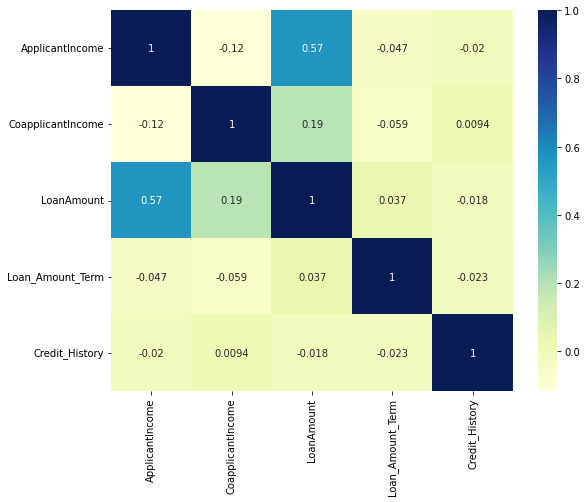

In [ ]:
#heat map
fig, ax = plt.subplots(figsize=(9, 7))
correlations = loan_train.corr() 
dataplot = sns.heatmap(correlations, cmap="YlGnBu", annot=True)  
plt.show()

Data Pre-processing

Encoding the categorical data

In [ ]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#encoding objects to numeric conversion
objectlist_train = loan_train.select_dtypes(include = "object").columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in objectlist_train:
    loan_train[feature] = le.fit_transform(loan_train[feature].astype(str))
print (loan_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 62.5 KB
None


In [ ]:
#for test data
objectlist_test = loan_test.select_dtypes(include='object').columns
for feature in objectlist_test:
    loan_test[feature] = le.fit_transform(loan_test[feature].astype(str))
print (loan_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int64  
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    float64
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 34.5 KB
None


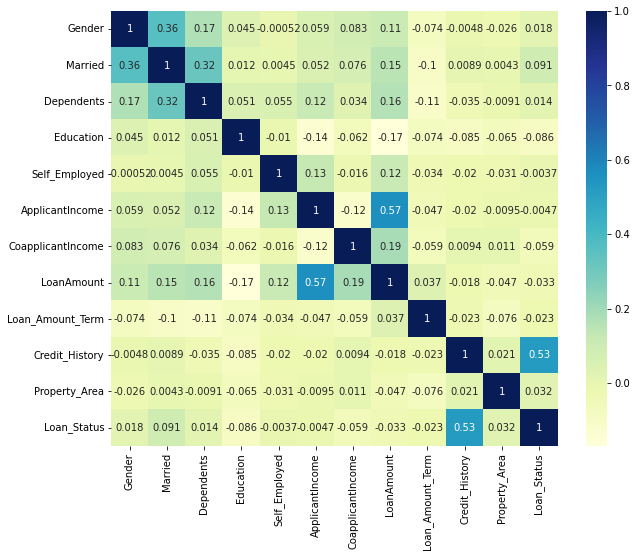

In [ ]:
#correlation with numeric variables 
fig, ax = plt.subplots(figsize=(10, 8))
correlations_ML = loan_train.iloc[:,1:].corr() # filer out the Loan_ID column as it is not relevant
sns.heatmap(correlations_ML, cmap="YlGnBu", annot=True)
plt.show()

Machine Learning Model Development

In [ ]:
#dropping loan_status column 
#loan_status column - dependent variable (rest of all are independent variable)
x = loan_train.iloc[:,1:].drop('Loan_Status', axis=1) 
y = loan_train['Loan_Status']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=0)

Decision Tree 

In [ ]:
df_model = DecisionTreeClassifier()
df_model.fit(train_x, train_y)
predict_y = df_model.predict(test_x)
print(classification_report(test_y, predict_y))
print("Accuracy:", accuracy_score(predict_y, test_y))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56        51
           1       0.83      0.84      0.84       134

    accuracy                           0.76       185
   macro avg       0.70      0.70      0.70       185
weighted avg       0.76      0.76      0.76       185

Accuracy: 0.7621621621621621


Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_x, train_y)
predict_y_2 = rf_model.predict(test_x)
print(classification_report(test_y, predict_y_2))
print("Accuracy:", accuracy_score(predict_y_2, test_y))

              precision    recall  f1-score   support

           0       0.79      0.51      0.62        51
           1       0.84      0.95      0.89       134

    accuracy                           0.83       185
   macro avg       0.81      0.73      0.75       185
weighted avg       0.82      0.83      0.81       185

Accuracy: 0.827027027027027


Logistic Regression

In [ ]:
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto')
lr_model.fit(train_x, train_y)
predict_y_3 = lr_model.predict(test_x)
print(classification_report(test_y, predict_y_3))
print("Accuracy:", accuracy_score(predict_y_3, test_y))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63        51
           1       0.83      0.98      0.90       134

    accuracy                           0.84       185
   macro avg       0.86      0.73      0.77       185
weighted avg       0.85      0.84      0.83       185

Accuracy: 0.8432432432432433


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy in models performed



*   Decision Tree - 76%
*   Random Forest - 83%
*   Logistic Regression - 84%






**Project Conclusion**



*   There is a positive relationship between credit history and loan status, same also between the applicant income & loan amount. 
*   Here mens got more loans, being married and graduate were also factors that results in loan approvals.
*   According to Machine learing models we performed, 84% accuracy we got in the Logistic Regression model which is the most suitable to make predictions.





